## Movie Review Aggregator Analysis: An Exploratory Data Analysis of Movie Reviews

### Problem Statement

A movie review podcast host is producing an episode about movie review aggregators and needs data-driven insights to share with their audience. Using a Rotten Tomatoes dataset, the goal is to explore patterns and relationships in movie ratings to uncover interesting facts that would engage podcast listeners.

#### Key Questions

1. **Rating Distribution**: How do critic ratings (Tomatometer) compare to audience ratings?
2. **Rating Correlation**: Is there a relationship between how critics and audiences rate movies?
3. **Runtime Impact**: Does movie runtime correlate with engagement metrics like number of ratings?
4. **Anomaly Detection**: Are there any unusual patterns or outliers in the data that tell an interesting story?

#### Read in the Data

In [2]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv(r'C:/Users/DELL/Desktop/Data/Maven_EDA_with_Python/Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [3]:
# Filter to specific columns
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [4]:
movies.shape

(16638, 9)

In [7]:
# There are 16638 movies in the dataset

In [9]:
# Changing the in_theaters_date field to date time from an object field
movies['in_theaters_date'] = pd.to_datetime(movies['in_theaters_date'])

In [5]:
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


In [6]:
movies.dtypes

movie_title                   object
rating                        object
genre                         object
in_theaters_date      datetime64[ns]
runtime_in_minutes           float64
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
audience_count               float64
dtype: object

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [10]:
# Only movies in 2010 and above
movies = movies[movies['in_theaters_date'].dt.year >= 2010]

In [8]:
movies.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0


In [9]:
# Number of movies in the dataset
movies.shape

(6053, 9)

In [11]:
# Number of movies in 2010 and above is 6053

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [12]:
# Highest rated movie tomatometer rating (according to critics)
movies.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7318,High Ground,NR,"Documentary, Special Interest",2012-11-02,91.0,100,8,74.0,295.0
11941,Rodney King,NR,Drama,2017-04-28,52.0,100,9,NaN,NaN
1468,11:55,NR,Drama,2017-06-09,80.0,100,5,81.0,378.0
13051,Stations of the Elevated,NR,"Documentary, Musical & Performing Arts, Specia...",2014-10-17,45.0,100,8,33.0,124.0
2592,Among Wolves,NR,Documentary,2019-02-08,94.0,100,12,91.0,106.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Thus, we filter the movies data set to only include movies that have 100k+ audience ratings, and examine the number of movies in the new dataset.

In [11]:
# Highest rated movie audience rating
movies.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
4027,Calling All Earthlings,NR,Documentary,2018-06-29,74.0,58,12,100.0,34.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0


In [12]:
movies_popular = movies[movies['audience_count'] > 100000]

In [13]:
movies_popular.shape

(316, 9)

Highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [14]:
movies_popular.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0


In [15]:
movies_popular.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0


Movie categories and their respective ratings

In [16]:
movies_popular['rating'].value_counts()

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [20]:
# Average audience rating
movies_popular.groupby('rating')['audience_rating'].mean().round(2).sort_values(ascending=False)

rating
PG-13    67.29
PG       66.82
G        66.20
R        63.01
Name: audience_rating, dtype: float64

In [21]:
# PG-13 movies are highest rated by the audience, averaging 67.29 ratings

## 2. Create New Columns

Creating column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. This is also applied to the *Action & Adventure* and *Comedy*.

In [22]:
import numpy as np

In [25]:
movies_popular = movies[movies['audience_count'] > 10000].copy()

In [26]:
movies_popular['Animation'] = np.where(movies_popular['genre'].str.contains('Animation'),1,0)

In [27]:
movies_popular['Action & Adventure'] = np.where(movies_popular['genre'].str.contains('Action & Adventure'),1,0)

In [28]:
movies_popular['Comedy'] = np.where(movies_popular['genre'].str.contains('Comedy'),1,0)

In [29]:
movies_popular.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0,0,0,1
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0,0,0,0


Table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre

In [31]:
movies_popular.groupby('rating')[['Animation', 'Action & Adventure', 'Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,14,5,10
NC17,0,0,0
NR,0,5,8
PG,87,67,100
PG-13,1,227,158
R,2,153,248


Average critic and audience rating for an Animation movie vs a non-Animation movie, Action & Adventure and Comedy. 

In [37]:
# Both critics and the general audience love animated movies
movies_popular.groupby('Animation')[['tomatometer_rating',	'audience_rating']].mean().round(2)

,tomatometer_rating,audience_rating
Animation,,
0,58.49,60.98
1,65.86,67.89


In [38]:
# The general audience likes action movies more than critics
movies_popular.groupby('Action & Adventure')[['tomatometer_rating',	'audience_rating']].mean().round(2)

,tomatometer_rating,audience_rating
Action & Adventure,,
0,60.51,61.39
1,55.28,61.58


In [40]:
# Comedies have lower ratings than othe genres
movies_popular.groupby('Comedy')[['tomatometer_rating',	'audience_rating']].mean().round(2)

,tomatometer_rating,audience_rating
Comedy,,
0,60.68,62.90
1,55.60,58.56


## 3. Data Visualization

Create a pair plot from the popular movies DataFrame.

In [41]:
import seaborn as sns

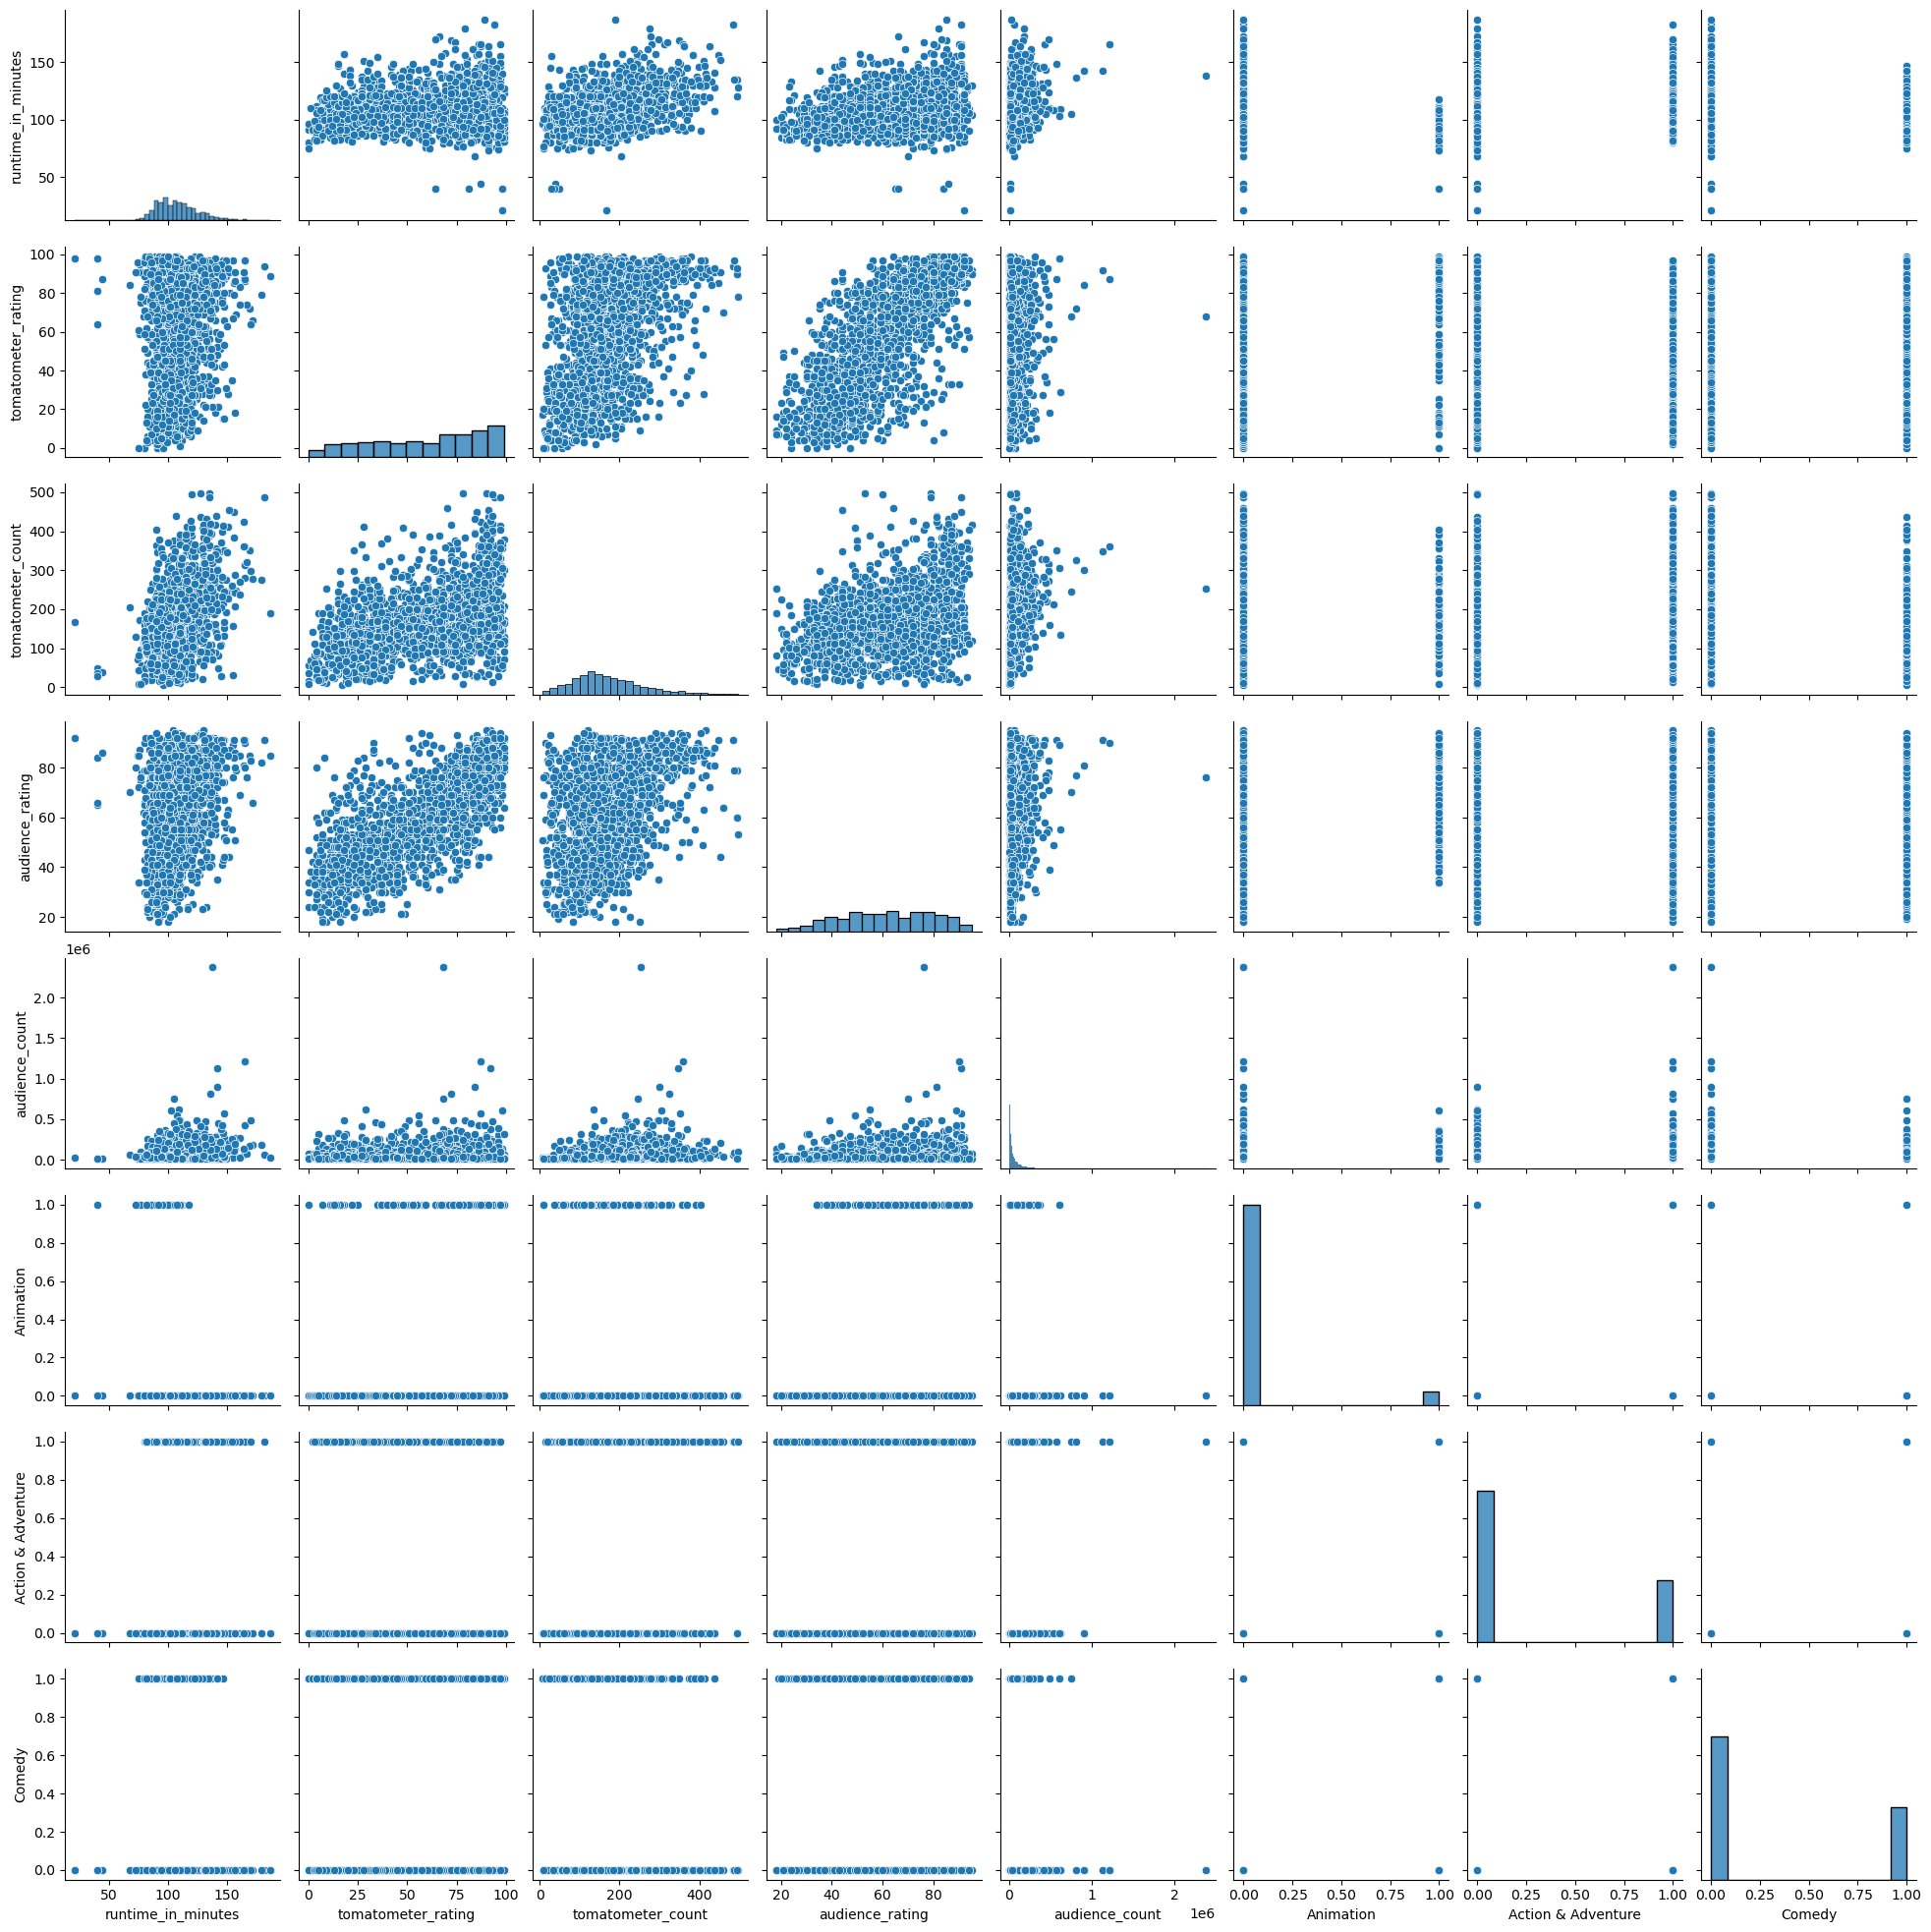

In [43]:
sns.pairplot(movies_popular);

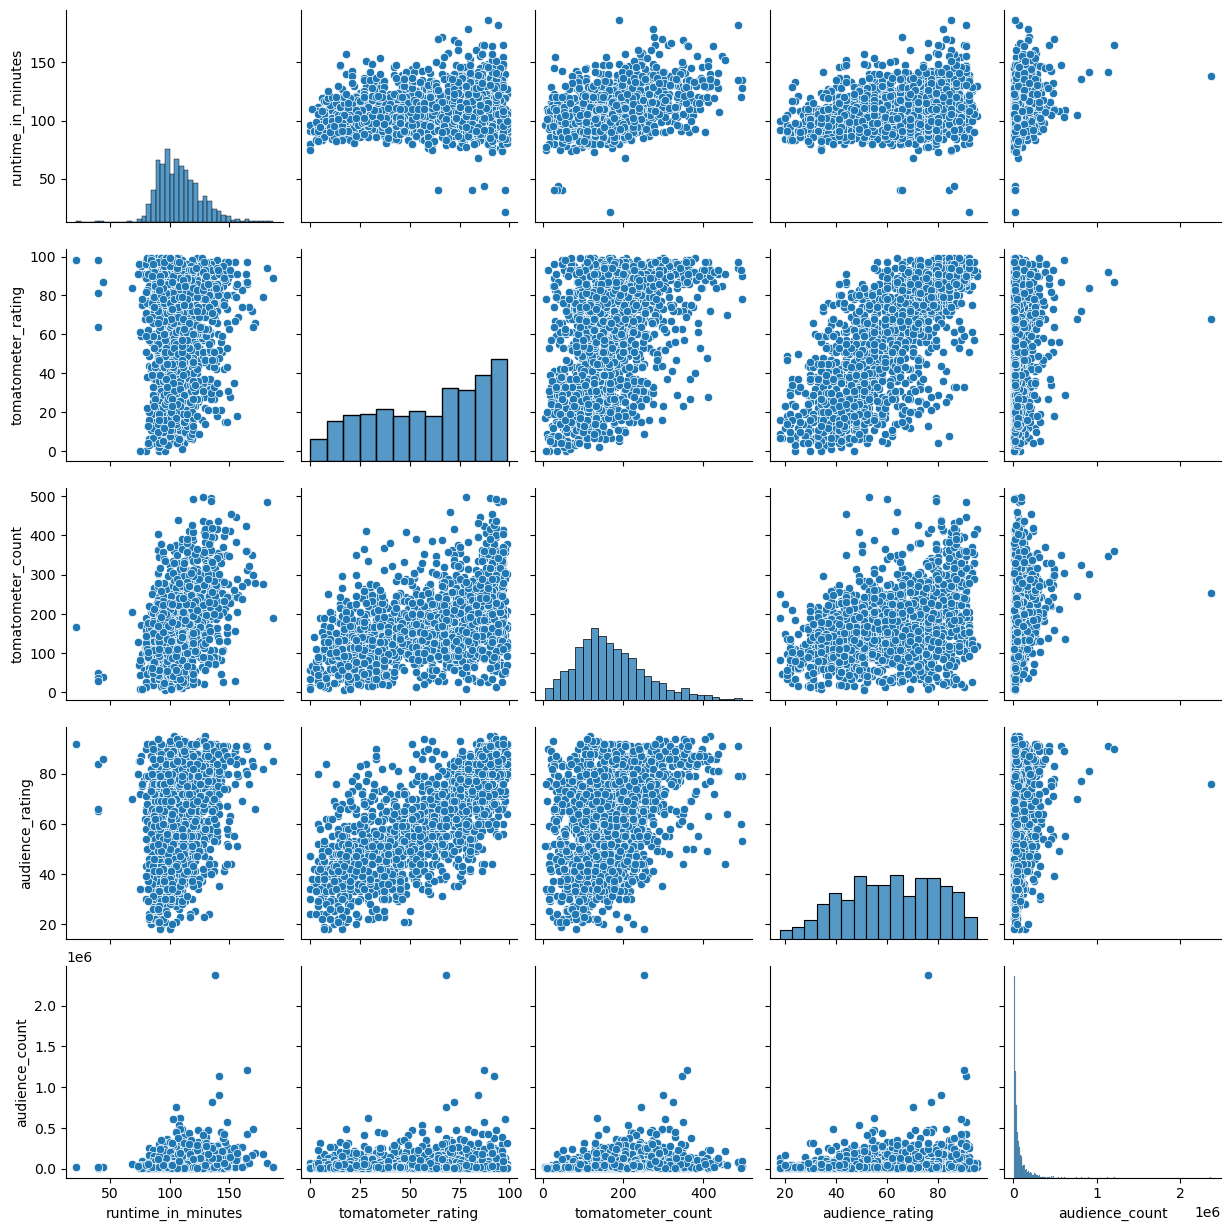

In [44]:
# The last three columns are not giving that much information, hence, i will exclude them
sns.pairplot(movies_popular.iloc[:,:-3]);

In [45]:
# We see an outlier in the runtime and we would like to confirm
movies_popular[movies_popular['audience_count'] > 1000000]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0,1,0
9581,Marvel's The Avengers,PG-13,"Action & Adventure, Science Fiction & Fantasy",2012-05-04,142.0,92,348,91.0,1134955.0,0,1,0
13936,The Dark Knight Rises,PG-13,"Action & Adventure, Drama, Mystery & Suspense",2012-07-20,165.0,87,360,90.0,1210957.0,0,1,0


##### Questions to drive the Insight generation  
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

In [46]:
movies_popular.corr(numeric_only=True)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
runtime_in_minutes,1.000000,0.144420,0.483062,0.304211,0.235308,-0.213390,0.191674,-0.265611
tomatometer_rating,0.144420,1.000000,0.412532,0.734804,0.031979,0.065675,-0.085126,-0.085829
tomatometer_count,0.483062,0.412532,1.000000,0.392469,0.299389,0.002185,0.263740,-0.129535
audience_rating,0.304211,0.734804,0.392469,1.000000,0.133995,0.095088,0.004663,-0.113169
audience_count,0.235308,0.031979,0.299389,0.133995,1.000000,0.052553,0.254522,-0.025082
Animation,-0.213390,0.065675,0.002185,0.095088,0.052553,1.000000,0.065622,0.158614
Action & Adventure,0.191674,-0.085126,0.263740,0.004663,0.254522,0.065622,1.000000,-0.169778
Comedy,-0.265611,-0.085829,-0.129535,-0.113169,-0.025082,0.158614,-0.169778,1.000000



## Findings

#### Critic vs. Audience Rating Patterns  
Critics give wide range of ratings and audience give slightly higher range of ratings    

#### Correlation between critic rating and audience rating  
Answer: As critic rating goes up, the audience rating likewise goes up based on the scatter plot . This is also evidenced by the positive correlation value of 0.74 in the correlation matrix table  

#### Observations on the run times of movies compared with other fields based on the scatter plots  
Answer: Runtime is correlated with the number of critic ratings. From the scatter plot, we see that as the runtime increases, the number of critic rating also increases. It appears that the longer a movie is, the more critic ratings it has. This is also confirmed by the correlation matrix value of the runtime_in_minutes and tomatometer_count value of 0.48. 

#### Outlier   
There is an oddly reoccuring outlier in the audience_count. This led to digging further to see the audience count. 

#### What is the most popular movie by far in terms of the number of audience ratings?
The presence of the outlier led to filtering movies around that outlier range, and revealed a high number of audience ratings (2373625 audience count) for the movie 'Shutter Island' and few critic ratings (253 tomatometer count) for the movie.  

#### Impact

These insights provided the podcast host with concrete, data-backed talking points how audience and critics interact with films, making for an engaging and informative episode.